In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import h5py

import sys
sys.path.append('../')
import utils

In [2]:
def gaussian(x, mean, sigma, peak):
    """ Return the normalized Gaussian with standard deviation sigma. """
    return peak * np.exp(-0.5 * ( (x-mean) / sigma)**2) 

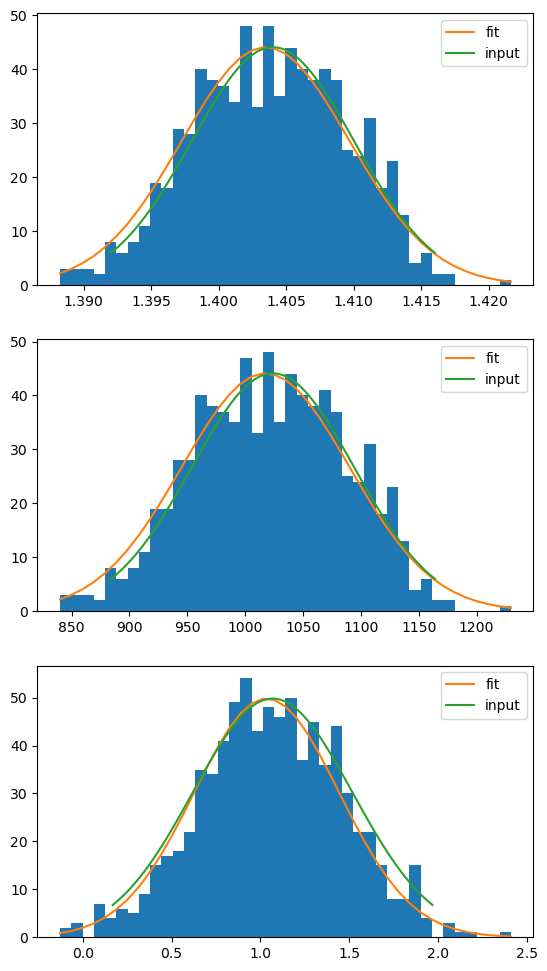

In [3]:
test_files = [f'test{i}.dat' for i in range(80,83)]
fig, axes = plt.subplots(len(test_files), 1 )
fig.set_figheight(4*len(test_files))
for i,test_file in enumerate(test_files):
    with open(test_file,'r') as f:
        gauss_params = [float(item) for item in f.readline().strip().split(' ')]
        samples = np.fromstring(f.read(), sep='\n')
        
    x = np.linspace(gauss_params[0]-2*gauss_params[1], gauss_params[0]+2*gauss_params[1], 100 )
    histoy, histox, _ = axes[i].hist(samples, 40)
    res, _ = sp.optimize.curve_fit( gaussian, histox[:-1], histoy, p0 = (gauss_params[0],gauss_params[1],max(histoy))  )
    axes[i].plot(histox, gaussian(histox,res[0],res[1],res[2] ) ,label="fit")
    axes[i].plot(x,gaussian(x,gauss_params[0],gauss_params[1], res[2]) , label="input")
    axes[i].legend()

In [2]:
def get_obs_name(name, index):
    return f"<MCObservable><Info>{name} {index} n re<|Info><|MCObservable>"

checks = {
    "ROT 0": {
        "E_in": ("10000T1g-ROT-0T5-15", 24),
        "N_in": ("10000T1g-ROT-0T5-15-20000G1g-N-SS_0-0T6-25", 4),
        "d_in": ("10000T1g-ROT-0T5-15", 424),
    },
    "ROT 1": {
        "E_in": ("10000T1g-ROT-1T5-15", 24),
        "N_in": ("10000T1g-ROT-1T5-15-20p1G1-N-SS_0-0T6-25", 4),
        "d_in": ("10000T1g-ROT-1T5-15", 424),
    },
    "ROT 2": {
        "E_in": ("10000T1g-ROT-2T5-15", 24),
        "N_in": ("10000T1g-ROT-2T5-15-20p1G1-N-SS_0-0T6-25", 4),
        "d_in": ("10000T1g-ROT-2T5-15", 424),
    },
}
with h5py.File('param_samplings_new_hexaquark_rebin1.hdf5','r') as params:
#     print(params['Values']['Values'].keys())
    for check in checks:
        checks[check]['E'] = params['Values']['Values'][get_obs_name(checks[check]['E_in'][0],checks[check]['E_in'][1])][()]
        checks[check]['N'] = params['Values']['Values'][get_obs_name(checks[check]['N_in'][0],checks[check]['N_in'][1])][()]
        checks[check]['d'] = params['Values']['Values'][get_obs_name(checks[check]['d_in'][0],checks[check]['d_in'][1])][()]
#     print(params['Values'].keys())

E-2N 	 d
-0.001344759229804593+-0.00022618258873681915 0.001221165713160884+-0.00891692512300701
-0.0042817832901766995+-0.00033307529984003686 -0.019513134465008578+-0.01282855019871442
1.3285507696414456e-05+-0.00031842908357607034 -0.014425062391992866+-0.012655158206563002


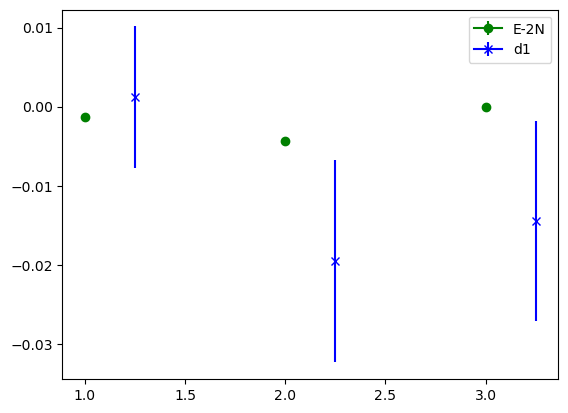

In [14]:
print("E-2N \t d")
plt.clf()
i=1
label=False
for check in checks:
    checks[check]['E-2N'] = checks[check]['E'] - 2.0*checks[check]['N']
    print(f"{checks[check]['E-2N'][0]}+-{utils.bootstrap_error_by_array(checks[check]['E-2N'])}", f"{checks[check]['d'][0]}+-{utils.bootstrap_error_by_array(checks[check]['d'])}")
    if not label:
        plt.errorbar(x=i, y=checks[check]['E-2N'][0], yerr=utils.bootstrap_error_by_array(checks[check]['E-2N']), color="green",marker="o", label="E-2N")
        plt.errorbar(x=i+0.25, y=checks[check]['d'][0], yerr=utils.bootstrap_error_by_array(checks[check]['d']), color="blue",marker="x", label="d1")
        label=True
    else:
        plt.errorbar(x=i, y=checks[check]['E-2N'][0], yerr=utils.bootstrap_error_by_array(checks[check]['E-2N']),marker="o", color="green")
        plt.errorbar(x=i+0.25, y=checks[check]['d'][0], yerr=utils.bootstrap_error_by_array(checks[check]['d']),marker="x", color="blue")
    i+=1
plt.legend()